<a href="https://colab.research.google.com/github/Y-Xiang/DeepLearning/blob/main/Assignment0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import csv
import sklearn as sk
import seaborn as sns

In [133]:
# pd.read_csv("test_out - Copy.csv")
train_in  = pd.read_csv("train_in - Copy.csv",header=None).add_prefix('x')
train_out  = pd.read_csv("train_out - Copy.csv",header=None)
train_out.columns = ['Label']
test_in  = pd.read_csv("test_in - Copy.csv",header=None).add_prefix('x')
test_out  = pd.read_csv("test_out - Copy.csv",header=None)
test_out.columns = ['Label']
print(train_in.loc[:10])
# print(train_out)
# print(str(train_out))


     x0   x1   x2     x3     x4     x5     x6     x7     x8     x9  ...  \
0  -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -0.631  0.862 -0.167  ...   
1  -1.0 -1.0 -1.0 -0.813 -0.671 -0.809 -0.887 -0.671 -0.853 -1.000  ...   
2  -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000 -0.996  ...   
3  -1.0 -1.0 -1.0 -1.000 -1.000 -0.273  0.684  0.960  0.450 -0.067  ...   
4  -1.0 -1.0 -1.0 -1.000 -1.000 -0.928 -0.204  0.751  0.466  0.234  ...   
5  -1.0 -1.0 -1.0 -1.000 -1.000 -0.397  0.983 -0.535 -1.000 -1.000  ...   
6  -1.0 -1.0 -1.0 -0.830  0.442  1.000  1.000  0.479 -0.328 -0.947  ...   
7  -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000  0.510 -0.213 -1.000  ...   
8  -1.0 -1.0 -1.0 -1.000 -1.000 -0.454  0.879 -0.745 -1.000 -1.000  ...   
9  -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -0.909  0.801 -0.899  ...   
10 -1.0 -1.0 -1.0 -1.000 -1.000 -0.596  0.912  1.000  0.290 -0.673  ...   

     x246   x247   x248   x249   x250   x251   x252   x253   x254  x255  
0   0.304  0.823  1.000  

In [117]:
# train_in = np.genfromtxt('train_in - Copy.csv', delimiter=',')
# train_out = np.genfromtxt('train_out - Copy.csv', delimiter=',')
# test_out = np.genfromtxt('test_out - Copy.csv', delimiter=',')

In [118]:
print(train_in.shape)
print(train_out.shape)
print(test_out.shape)


(1707, 256)
(1707, 1)
(1000, 1)


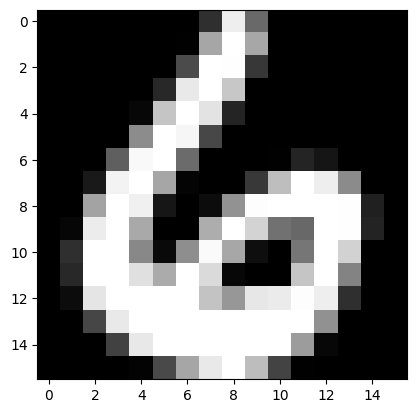

In [119]:
first_image = train_in.iloc[0].to_numpy()
pixels = first_image.reshape((16, 16))
plt.imshow(pixels, cmap='gray')
plt.show()

In [120]:
new_train = train_in
new_train.loc[:, "Label"] = train_out.astype(str)
print(new_train.loc[:3])
new_train.loc[new_train['Label'] == '3'].mean(numeric_only=True)
cd = {}
for i in range(10):
  cd[i] = new_train.loc[new_train['Label'] == str(i)].mean(numeric_only=True)
# print(cd[9])
# cd[0]-cd[1]
cddf = pd.DataFrame(cd)
cddf

    x0   x1   x2     x3     x4     x5     x6     x7     x8     x9  ...   x247  \
0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -0.631  0.862 -0.167  ...  0.823   
1 -1.0 -1.0 -1.0 -0.813 -0.671 -0.809 -0.887 -0.671 -0.853 -1.000  ... -0.671   
2 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000 -0.996  ... -1.000   
3 -1.0 -1.0 -1.0 -1.000 -1.000 -0.273  0.684  0.960  0.450 -0.067  ...  1.000   

    x248   x249   x250   x251   x252   x253   x254  x255  Label  
0  1.000  0.482 -0.474 -0.991 -1.000 -1.000 -1.000  -1.0      6  
1 -0.033  0.761  0.762  0.126 -0.095 -0.671 -0.828  -1.0      5  
2 -1.000 -0.109  1.000 -0.179 -1.000 -1.000 -1.000  -1.0      4  
3  0.536 -0.987 -1.000 -1.000 -1.000 -1.000 -1.000  -1.0      7  

[4 rows x 257 columns]


,0,1,2,3,4,5,6,7,8,9
x0,-1.000000,-1.0,-0.986797,-1.000000,-1.000000,-1.000000,-1.000000,-0.985030,-0.999285,-1.000000
x1,-0.997524,-1.0,-0.941292,-0.989557,-1.000000,-0.994852,-1.000000,-0.900476,-0.974076,-1.000000
x2,-0.987003,-1.0,-0.876579,-0.917977,-1.000000,-0.980898,-1.000000,-0.777145,-0.917743,-1.000000
x3,-0.945918,-1.0,-0.804203,-0.728794,-0.984016,-0.931909,-1.000000,-0.619380,-0.822118,-0.995712
x4,-0.844044,-1.0,-0.629980,-0.378145,-0.910434,-0.840636,-0.997404,-0.434488,-0.617340,-0.963902
...,...,...,...,...,...,...,...,...,...,...
x251,-0.850539,-1.0,-0.825832,-0.592107,-0.778877,-0.550636,-0.870583,-0.997494,-0.875514,-0.993515
x252,-0.976881,-1.0,-0.773213,-0.795198,-0.926730,-0.784170,-0.962073,-1.000000,-0.972472,-0.984977
x253,-0.998734,-1.0,-0.775074,-0.925282,-0.979664,-0.906341,-0.993026,-1.000000,-0.993299,-0.985379
x254,-1.000000,-1.0,-0.851668,-0.979122,-0.989631,-0.971966,-1.000000,-1.000000,-0.999986,-0.994826


In [121]:
nrow = len(new_train.index)
new_train[:10]
# print(cddf.shape)
# print(new_train.iloc[1,:-1].shape)
# print(new_train.loc[3, "Label"])
new_train.iloc[222,:-1]
# cddf - new_train.iloc[1,:-1]
newdf = (cddf.subtract(new_train.iloc[1,:-1],axis=0)**2).sum()
# print(newdf.idxmin())
# new_train.loc[:, new_train.columns != 'Label'].mean()
for i in range(nrow):
  pred_i_df = (cddf.subtract(new_train.iloc[i,:-1],axis=0)**2).sum()
  # print(pred_i_df.idxmin())
  new_train.loc[i, "Pred_Label"] = pred_i_df.idxmin().astype(str)
print(new_train.loc[:3])


def nearestmean(data):
  nrow = len(data.index)
  for i in range(nrow):
    pred_i_df = (cddf.subtract(data.iloc[i,:-1],axis=0)**2).sum()
    data.loc[i, "Pred_Label"] = pred_i_df.idxmin().astype(str)
  return data
  # new_train.loc[i, 'New Label'] =

    x0   x1   x2     x3     x4     x5     x6     x7     x8     x9  ...   x248  \
0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -0.631  0.862 -0.167  ...  1.000   
1 -1.0 -1.0 -1.0 -0.813 -0.671 -0.809 -0.887 -0.671 -0.853 -1.000  ... -0.033   
2 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000 -0.996  ... -1.000   
3 -1.0 -1.0 -1.0 -1.000 -1.000 -0.273  0.684  0.960  0.450 -0.067  ...  0.536   

    x249   x250   x251   x252   x253   x254  x255  Label  Pred_Label  
0  0.482 -0.474 -0.991 -1.000 -1.000 -1.000  -1.0      6           6  
1  0.761  0.762  0.126 -0.095 -0.671 -0.828  -1.0      5           5  
2 -0.109  1.000 -0.179 -1.000 -1.000 -1.000  -1.0      4           4  
3 -0.987 -1.000 -1.000 -1.000 -1.000 -1.000  -1.0      7           7  

[4 rows x 258 columns]


In [122]:
len(new_train.loc[new_train['Label']==new_train['Pred_Label']].index)/nrow
# nearestmean(new_train)
# len(new_train.loc[new_train['Label']==new_train['Pred_Label']].index)/nrow


0.8635032220269478

In [123]:
dist_arr = np.zeros(shape=(10, 10))
for j in range(10):
  for k in range(10):
    dist_arr[j,k] = np.sqrt(np.sum((cd[j] - cd[k]) ** 2))
print(dist_arr.round(3))

[[ 0.    14.45   9.335  9.144 10.77   7.519  8.154 11.865  9.908 11.489]
 [14.45   0.    10.125 11.733 10.174 11.119 10.615 10.743 10.087  9.932]
 [ 9.335 10.125  0.     8.178  7.933  7.907  7.332  8.873  7.078  8.888]
 [ 9.144 11.733  8.178  0.     9.088  6.119  9.302  8.922  7.02   8.354]
 [10.77  10.174  7.933  9.088  0.     8.002  8.782  7.583  7.381  6.01 ]
 [ 7.519 11.119  7.907  6.119  8.002  0.     6.699  9.212  6.967  8.259]
 [ 8.154 10.615  7.332  9.302  8.782  6.699  0.    10.888  8.587 10.44 ]
 [11.865 10.743  8.873  8.922  7.583  9.212 10.888  0.     8.468  5.426]
 [ 9.908 10.087  7.078  7.02   7.381  6.967  8.587  8.468  0.     6.401]
 [11.489  9.932  8.888  8.354  6.01   8.259 10.44   5.426  6.401  0.   ]]


In [124]:
new_test = test_in
new_test.loc[:, "Label"] = test_out.astype(str)
nearestmean(new_test)
len(new_test.loc[new_test['Label']==new_test['Pred_Label']].index)/nrow


0.4710017574692443

<Axes: xlabel='PC1', ylabel='PC2'>

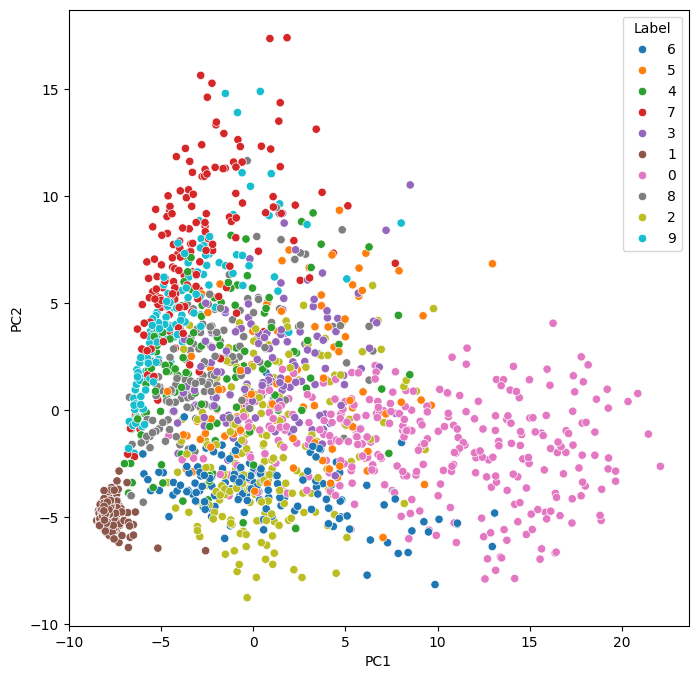

In [125]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x = StandardScaler().fit_transform(train_in)
# pca = PCA(n_components=2)
pca = PCA()
pc_x = pca.fit_transform(x)
# pc_x[:,:2]
# print(pca.explained_variance_ratio_)
# print(pca.singular_values_)
pc_xdf = pd.DataFrame(data = pc_x[:,:2],columns = ['PC1','PC2'])
pc_xdf.loc[:, "Label"] = train_out.astype(str)
pc_xdf

fig = plt.figure(figsize = (8,8))
sns.scatterplot(data=pc_xdf, x="PC1", y="PC2", hue="Label")



In [126]:
# !pip install umap-learn

In [127]:
import umap
embedding = umap.UMAP(random_state=42).fit_transform(x)
embedding.shape


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(1707, 2)

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

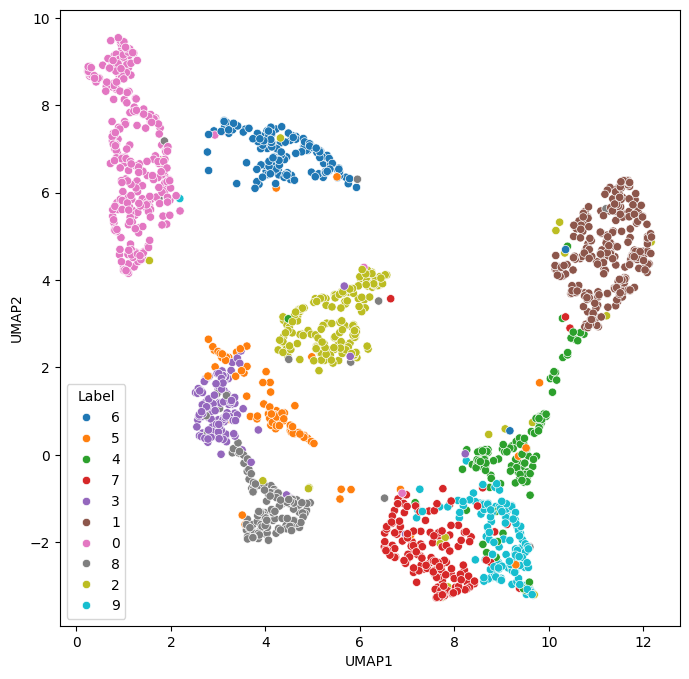

In [128]:
# plt.scatter(embedding[:, 0], embedding[:, 1])
# plt.xlabel('UMAP_1')
# plt.ylabel('UMAP_2')
# plt.show()

umap_xdf = pd.DataFrame(data = embedding, columns = ['UMAP1','UMAP2'])
umap_xdf.loc[:, "Label"] = train_out.astype(str)

fig = plt.figure(figsize = (8,8))
sns.scatterplot(data=umap_xdf, x="UMAP1", y="UMAP2", hue="Label")

<Axes: xlabel='TSNE1', ylabel='TSNE2'>

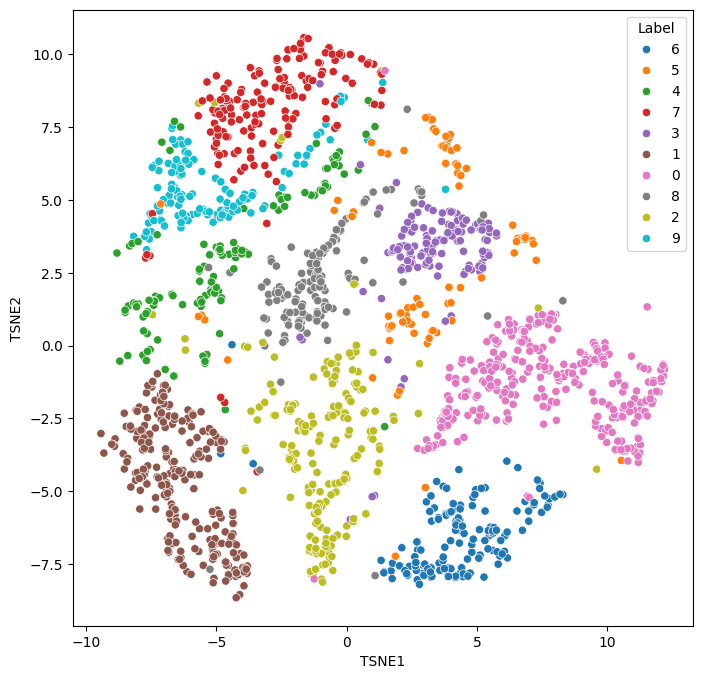

In [129]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=40, n_iter=300)
tsne_x = tsne.fit_transform(x)
tsne_xdf = pd.DataFrame(data = tsne_x,columns = ['TSNE1','TSNE2'])
tsne_xdf.loc[:, "Label"] = train_out.astype(str)
tsne_xdf

fig = plt.figure(figsize = (8,8))
sns.scatterplot(data=tsne_xdf, x="TSNE1", y="TSNE2", hue="Label")

In [136]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_in, train_out)
knn_pred = knn.predict(test_in)
new_test['Knn_Label'] = knn_pred.astype(str)
print(len(new_test.loc[new_test['Label']==new_test['Knn_Label']].index)/nrow)
new_test.iloc[10:20]

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.5360281195079086


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x249,x250,x251,x252,x253,x254,x255,Label,Pred_Label,Knn_Label
10,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,0,0,0
11,-1.0,-1.0,-1.000,-1.000,0.385,0.999,0.999,0.523,-0.909,-1.000,...,-0.956,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,0,0,0
12,-1.0,-1.0,-1.000,-1.000,-1.000,-0.672,0.883,0.999,0.116,-0.829,...,0.328,-0.727,-1.000,-1.000,-1.000,-1.000,-1.0,0,0,0
13,-1.0,-1.0,-1.000,-1.000,-1.000,-0.954,0.496,0.010,-0.965,-1.000,...,0.416,-0.231,-0.578,-1.000,-1.000,-1.000,-1.0,0,0,0
14,-1.0,-1.0,-0.618,0.662,1.000,0.962,0.355,-0.252,-0.985,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,2,2,2
15,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.887,-0.009,0.674,0.427,...,1.000,0.151,-1.000,-1.000,-1.000,-1.000,-1.0,0,8,0
16,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.997,-0.761,-0.139,0.241,...,0.489,0.181,-0.078,-0.700,-0.999,-1.000,-1.0,0,5,0
17,-1.0,-1.0,-1.000,-1.000,-1.000,-0.795,-0.306,0.179,0.785,1.000,...,-1.000,-1.000,-0.986,-0.582,0.300,0.646,-1.0,2,5,0
18,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.944,-0.711,-0.360,-0.011,...,0.015,-0.854,-1.000,-1.000,-1.000,-1.000,-1.0,9,4,9
19,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,0,0,0


In [137]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(new_test['Label'], new_test['Pred_Label']))
print(confusion_matrix(new_test['Label'], new_test['Knn_Label']))

[[178   0   3   2   4   2  23   1  10   1]
 [  0 120   0   0   0   0   1   0   0   0]
 [  2   0  69   6   8   1   0   2  13   0]
 [  3   0   3  61   1   8   0   0   1   2]
 [  1   3   3   0  69   0   1   1   0   8]
 [  3   0   0   6   3  38   1   0   0   4]
 [  7   0   2   0   2   1  78   0   0   0]
 [  0   2   1   0   5   0   0  50   0   6]
 [  3   2   0   6   3   3   0   0  73   2]
 [  0   5   0   0   8   0   0   5   2  68]]
[[219   0   2   0   0   0   1   1   0   1]
 [  0 118   0   0   0   0   2   1   0   0]
 [  5   1  84   2   0   0   1   3   4   1]
 [  3   0   2  71   0   2   0   0   0   1]
 [  0   2   3   0  77   0   0   2   0   2]
 [  3   0   0   5   0  41   0   3   2   1]
 [  4   0   0   0   2   0  84   0   0   0]
 [  0   1   0   1   3   0   0  59   0   0]
 [  1   1   0   6   0   2   1   1  78   2]
 [  1   0   0   0   0   0   0   2   1  84]]
